<a href="https://colab.research.google.com/github/Pidathala-Surendra-Reddy/Telco-Customer-churn/blob/code/group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TELCO CHURN DATASET


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/group2_dataset.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# 1. What is the overall churn rate (percentage of customers who left)?

percentage Of Customers who left : 26.536987079369588


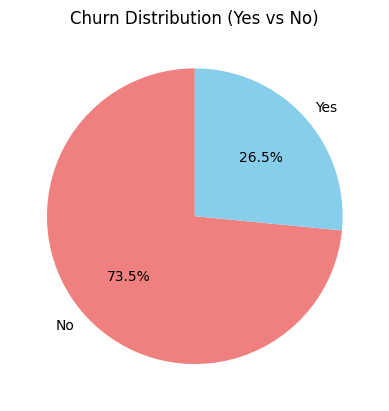

In [ ]:
df['Churn'].value_counts()        # checking how many members are said yes and no
churn_yes=df[df['Churn'] == 'Yes']   #filtering the data and choosing yes valuess
churn_yes.shape[0]                   # only rows from filter datata
df.shape[0]
churn_percentage = (churn_yes.shape[0]/df.shape[0])*100.     #findng the percentage
print("percentage Of Customers who left :",churn_percentage)


import matplotlib.pyplot as plt

# Count Yes and No
churn_counts = df['Churn'].value_counts()

# Pie chart
plt.pie(churn_counts,
        labels=churn_counts.index,autopct='%1.1f%%',startangle=90,colors=['lightcoral','skyblue'])
plt.title("Churn Distribution (Yes vs No)")
plt.show()


# 2. How does churn vary by customer demographic segments (gender, senior citizen, partner, dependents)?

GENDER

gender
Male      3555
Female    3488
Name: count, dtype: int64
   gender Churn  count
0  Female    No   2549
1  Female   Yes    939
2    Male    No   2625
3    Male   Yes    930


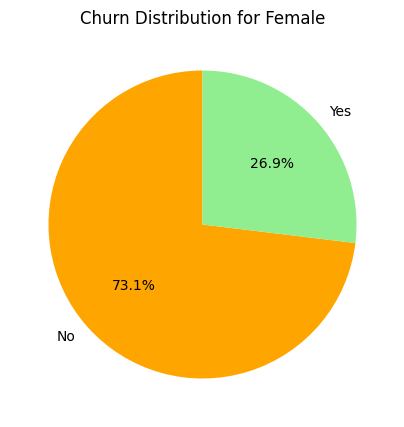

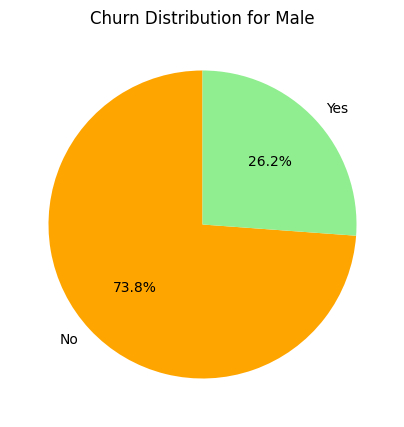

In [ ]:
# Grouping churn counts by gender
# We use value_counts instead of mean because 'Churn' is still categorical (Yes/No), not numeric
print(df["gender"].value_counts())
gender = df.groupby('gender')['Churn'].value_counts().reset_index()
print(gender)  # Prints the table showing number of Yes/No churns for each gender

# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Get all unique genders in the dataset
genders = df['gender'].unique()  # Example: ['Male', 'Female']

# Loop through each gender to plot churn distribution separately
for g in genders:
    # Filter dataset for the current gender and count churn values
    data = df[df['gender'] == g]['Churn'].value_counts()

    # Create a pie chart
    plt.figure(figsize=(5,5))  # Set figure size
    plt.pie(
        data,                  # Values for the pie chart
        labels=data.index,     # Labels (Yes/No)
        autopct='%1.1f%%',     # Show percentage values on pie slices
        startangle=90,         # Start the first slice at 90 degrees
        colors=['orange','lightgreen']  # Colors for the slices
    )
    plt.title(f"Churn Distribution for {g}")  # Title for the plot
    plt.show()  # Display the pie chart









*  CONCULSION: Overall review is there is no differnce in gender to churn at all.



*  SOLUTION: Conduct surveys or feedback forms for customers and try to solving them quickly




senior citizen

   SeniorCitizen Churn  count
0              0    No   4508
1              0   Yes   1393
2              1    No    666
3              1   Yes    476


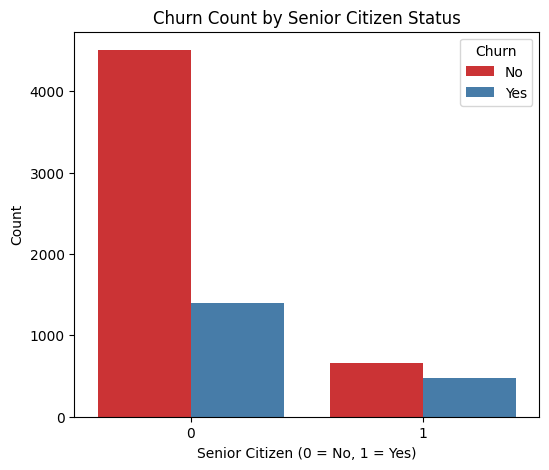

In [ ]:
# Grouping churn counts by SeniorCitizen status
# We use value_counts because 'Churn' is categorical (Yes/No)
senior_citizen = df.groupby('SeniorCitizen')['Churn'].value_counts().reset_index()

# Print the table to see churn counts for senior citizens vs non-senior citizens
print(senior_citizen)

# Importing libraries (sns and plt already imported earlier)
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(6,5))

# Create a count plot showing churn by SeniorCitizen status
# x = 'SeniorCitizen' → groups on x-axis (0 = No, 1 = Yes)
# hue = 'Churn' → different color bars for Yes/No churn
# palette = "Set1" → color scheme for bars
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, palette="Set1")

# Add title and labels for better readability
plt.title("Churn Count by Senior Citizen Status")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Add a legend to distinguish churn vs non-churn
plt.legend(title="Churn")

# Display the plot
plt.show()


CONCLUSION: From this bar graph there is high chance of churn from senior citizens.



*   CONCLUSION: From this bar graph there is high chance of churn from senior citizens.
*   SOLUTION: Giving them priority and solving the problems quickly.



**partner**

  Partner Churn  count
0      No    No   2441
1      No   Yes   1200
2     Yes    No   2733
3     Yes   Yes    669


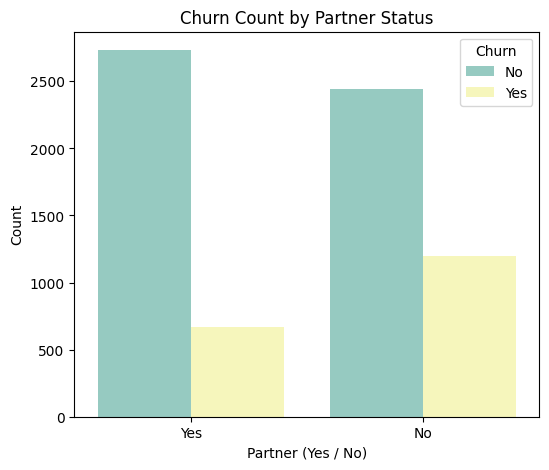

In [ ]:
# Grouping churn counts by Partner status
# 'Churn' is categorical, so we use value_counts to count Yes/No churns per Partner category
Partner = df.groupby('Partner')['Churn'].value_counts().reset_index()

# Print the table to see number of churned and non-churned customers for each Partner status
print(Partner)

# Import libraries for visualization (already imported earlier)
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better visibility
plt.figure(figsize=(6,5))

# Create a count plot showing churn by Partner status
# x = 'Partner' → groups on x-axis (Yes / No)
# hue = 'Churn' → different colors for churned (Yes) vs non-churned (No)
# palette = "Set3" → choose color scheme for bars
sns.countplot(x="Partner", hue="Churn", data=df, palette="Set3")

# Add title and axis labels for clarity
plt.title("Churn Count by Partner Status")
plt.xlabel("Partner (Yes / No)")
plt.ylabel("Count")

# Add a legend to distinguish churned vs non-churned
plt.legend(title="Churn")

# Display the plot
plt.show()



dependents

  Dependents Churn  count
0         No    No   3390
1         No   Yes   1543
2        Yes    No   1784
3        Yes   Yes    326


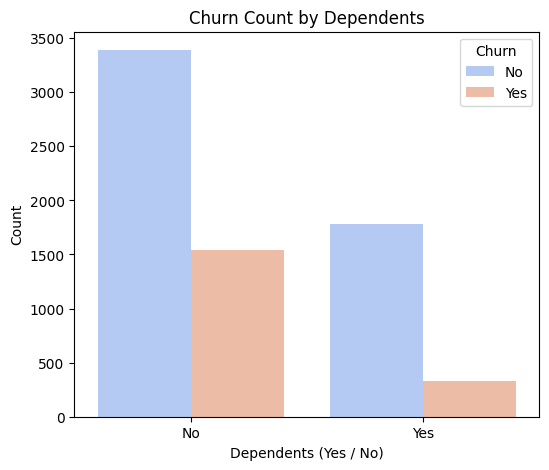

In [ ]:
dependents=df.groupby('Dependents')['Churn'].value_counts().reset_index()
print(dependents)
plt.figure(figsize=(6,5))
sns.countplot(x="Dependents", hue="Churn", data=df, palette="coolwarm")

plt.title("Churn Count by Dependents")
plt.xlabel("Dependents (Yes / No)")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()


CONCLUSION: independent in decision-making, so they switch easily if unhappy.

SOLUTION : Create fun quizzes or polls related to your service or product.

1.   Give small rewards or points for completing challenges
2.   Log in every day for a week → earn points or
Try a new feature → get a discount or bonus



# 3. how does churn differ by type of internet services (DSL, Fiber optic, None)?

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
  InternetService Churn  count
0             DSL    No   1962
1             DSL   Yes    459
2     Fiber optic    No   1799
3     Fiber optic   Yes   1297
4              No    No   1413
5              No   Yes    113
  InternetService Churn  proportion
0             DSL    No    0.810409
1             DSL   Yes    0.189591
2     Fiber optic    No    0.581072
3     Fiber optic   Yes    0.418928
4              No    No    0.925950
5              No   Yes    0.074050


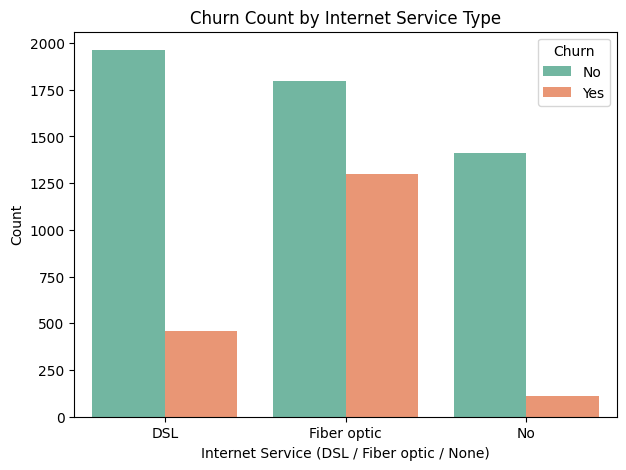

In [ ]:
#how does churn differ by type of internet services (DSL, Fiber optic, None)?
# Count how many customers have each type of Internet service
x = df['InternetService'].value_counts()
print(x)  # Prints counts of DSL, Fiber optic, None

# Group by Internet service type and count churned vs non-churned customers
y = df.groupby('InternetService')['Churn'].value_counts().reset_index()
print(y)  # Shows number of Yes/No churns for each InternetService type

# Calculate churn rate (percentage) for each Internet service type
churn_by_internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).reset_index()
print(churn_by_internet)  # Prints churn proportions for each InternetService type

# Import libraries for visualization (if not already imported)
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(7,5))

# Create a count plot of churn by Internet service type
# x = 'InternetService' → Internet type on x-axis
# hue = 'Churn' → separate colors for churned (Yes) vs non-churned (No)
# palette = "Set2" → choose color scheme
sns.countplot(x="InternetService", hue="Churn", data=df, palette="Set2")

# Add title and axis labels for clarity
plt.title("Churn Count by Internet Service Type")
plt.xlabel("Internet Service (DSL / Fiber optic / None)")
plt.ylabel("Count")

# Add legend to distinguish churned vs non-churned
plt.legend(title="Churn")

# Display the plot
plt.show()



CONCLUSION: Fiber optic customers often have higher churn rates than DSL or no Internet.

SOLUTION: Faster and stable service makes customers less likely to leave.

# 4. Among customers with Internet service, compare churn rates for streaming services (StreamingTV, StreamingMovies), online security, online backup, device protection, tech support, and contract type.


Churn rate by StreamingTV:
           StreamingTV  ChurnRate
0                   No   0.335231
1  No internet service   0.074050
2                  Yes   0.300702


/tmp/ipython-input-4089476168.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ChurnRate', data=churn_rate, palette="Set2")


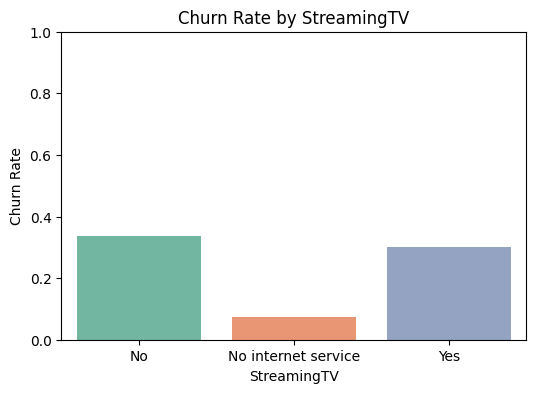


Churn rate by StreamingMovies:
       StreamingMovies  ChurnRate
0                   No   0.336804
1  No internet service   0.074050
2                  Yes   0.299414


/tmp/ipython-input-4089476168.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ChurnRate', data=churn_rate, palette="Set2")


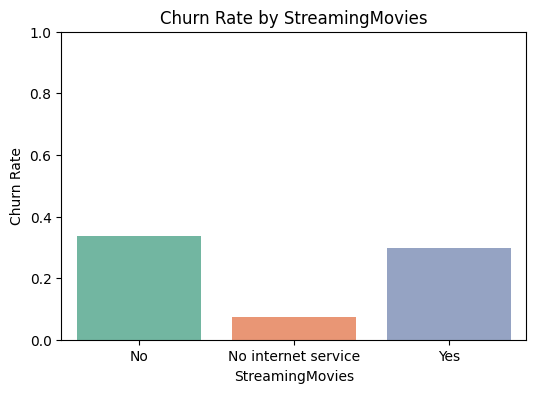


Churn rate by OnlineSecurity:
        OnlineSecurity  ChurnRate
0                   No   0.417667
1  No internet service   0.074050
2                  Yes   0.146112


/tmp/ipython-input-4089476168.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ChurnRate', data=churn_rate, palette="Set2")


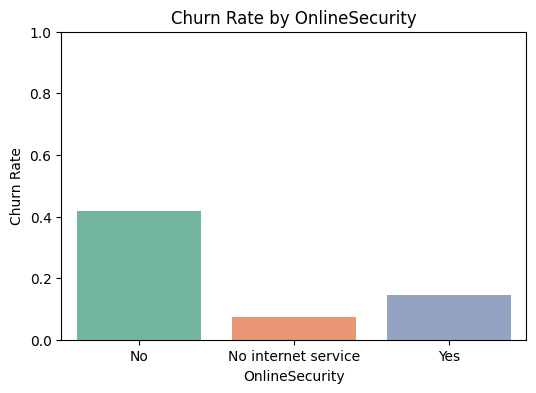


Churn rate by OnlineBackup:
          OnlineBackup  ChurnRate
0                   No   0.399288
1  No internet service   0.074050
2                  Yes   0.215315


/tmp/ipython-input-4089476168.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ChurnRate', data=churn_rate, palette="Set2")


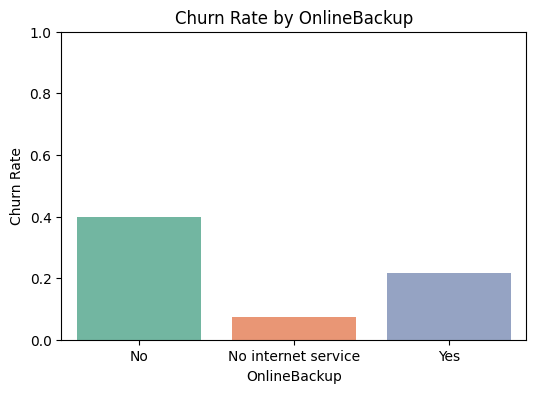


Churn rate by DeviceProtection:
      DeviceProtection  ChurnRate
0                   No   0.391276
1  No internet service   0.074050
2                  Yes   0.225021


/tmp/ipython-input-4089476168.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ChurnRate', data=churn_rate, palette="Set2")


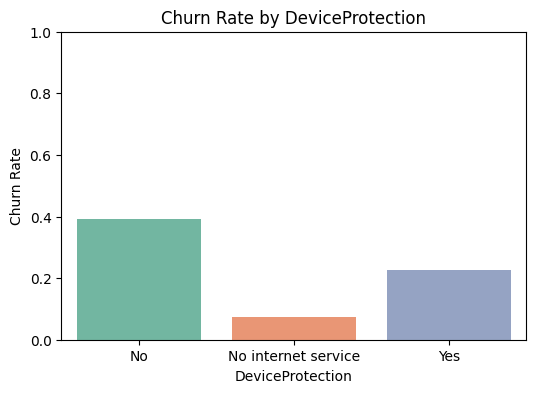


Churn rate by TechSupport:
           TechSupport  ChurnRate
0                   No   0.416355
1  No internet service   0.074050
2                  Yes   0.151663


/tmp/ipython-input-4089476168.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ChurnRate', data=churn_rate, palette="Set2")


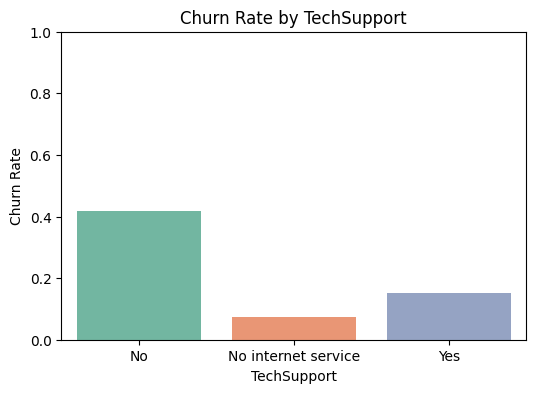


Churn rate by Contract:
         Contract  ChurnRate
0  Month-to-month   0.427097
1        One year   0.112695
2        Two year   0.028319


/tmp/ipython-input-4089476168.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='ChurnRate', data=churn_rate, palette="Set2")


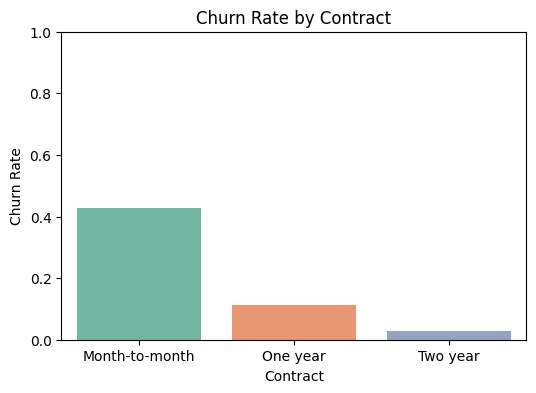

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1Convert Churn to numeric
df['Churn_numerical'] = df['Churn'].map({'Yes': 1, 'No': 0})

#  Filter customers with Internet service (exclude "None")
df_internet = df[df['InternetService'] != "None"]

#  Columns to analyze
cols_to_check = [
    'StreamingTV', 'StreamingMovies',
    'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport',
    'Contract'
]

# Loop through each column, calculate churn rate, and plot
for col in cols_to_check:
    # Calculate churn rate
    churn_rate = df_internet.groupby(col)['Churn_numerical'].mean().reset_index()
    churn_rate.columns = [col, 'ChurnRate']

    print(f"\nChurn rate by {col}:")
    print(churn_rate)

    # Plot churn rate
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='ChurnRate', data=churn_rate, palette="Set2")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xlabel(col)
    plt.ylim(0,1)  # 0% to 100%
    plt.show()


OVERVIEW: Customers using more value-added services (Streaming, Security, Backup, DeviceProtection, TechSupport) tend to churn less.

# 6. Does having multiple services (e.g., phone + internet + streaming) decrease or increase churn compared to fewer services?

    TotalServices        Contract  ChurnRate
0             1.0  Month-to-month   0.237241
1             1.0        One year   0.030952
2             1.0        Two year   0.007353
3             2.0  Month-to-month   0.443454
4             2.0        One year   0.055556
5             2.0        Two year   0.034682
6             3.0  Month-to-month   0.459686
7             3.0        One year   0.108504
8             3.0        Two year   0.025000
9             4.0  Month-to-month   0.539402
10            4.0        One year   0.228507
11            4.0        Two year   0.053381


Text(0.5, 0, 'Number of Services')

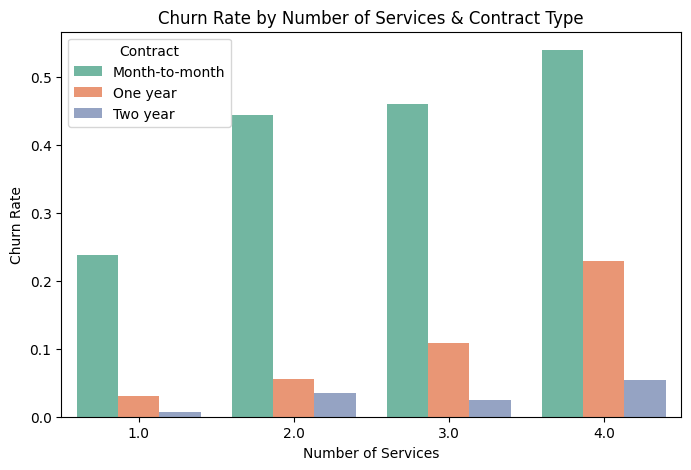

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Churn' to numeric values for calculations (Yes=1, No=0)
df['Churn_numerical'] = df['Churn'].map({'Yes': 1, 'No': 0})

# List of service columns to analyze
service_columns = ['PhoneService','InternetService','StreamingTV','StreamingMovies']

# Convert service columns to numeric values (1 if service active, 0 if not)
for col in service_columns:
    df[col+'_num'] = df[col].map({'Yes': 1, 'No': 0, 'DSL': 1, 'Fiber optic': 1, 'None': 0})

# Calculate total number of active services for each customer
df['TotalServices'] = df[[col+'_num' for col in service_columns]].sum(axis=1)

# Group by total services and contract type, calculate average churn rate
churn_by_services = df.groupby(['TotalServices', 'Contract'])['Churn_numerical'].mean().reset_index()
churn_by_services.columns = ['TotalServices', 'Contract', 'ChurnRate']

# Print churn rate table for analysis
print(churn_by_services)

# Set figure size for better visualization
plt.figure(figsize=(8,5))

# Create a bar plot to show churn rate by total services and contract type
sns.barplot(x='TotalServices', y='ChurnRate', hue='Contract', data=churn_by_services, palette="Set2")

# Add title and axis labels
plt.title("Churn Rate by Number of Services & Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Number of Services")

# Set y-


OVERVIEW: Customers who subscribe to more services (like phone, Internet, Streaming TV/Movies) usually have lower churn rates.


*   Reason: They are more engaged with the company, use more features, and feel value for money.

*   Customers with fewer services or basic plans tend to churn more, likely because:


1.   If a customer thinks, “I’m getting my money’s not worth and not able to enjoy the service,” they will leave.”


# 7.How does churn vary by contract type (Month-to-month, One year, Two year)?

         Contract  ChurnRate
0  Month-to-month  42.709677
1        One year  11.269518
2        Two year   2.831858


/tmp/ipython-input-767866529.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='ChurnRate', data=churn_by_contract, palette="Set2")


Text(0.5, 0, 'Contract Type')

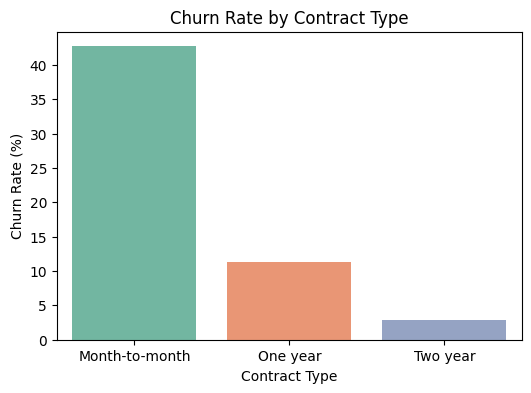

In [ ]:
# Convert 'Churn' from categorical to numeric (Yes=1, No=0) for calculations
df['Churn_numerical'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Group by 'Contract' type and calculate average churn rate
churn_by_contract = df.groupby('Contract')['Churn_numerical'].mean().reset_index()
churn_by_contract.columns = ['Contract', 'ChurnRate']  # Rename columns for clarity

# Convert churn rate to percentage
churn_by_contract['ChurnRate'] = churn_by_contract['ChurnRate'] * 100

# Print churn rates by contract type
print(churn_by_contract)

# Import visualization libraries (if not already imported)
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(6,4))

# Create a bar plot showing churn rate by contract type
sns.barplot(x='Contract', y='ChurnRate', data=churn_by_contract, palette="Set2")

# Add title and axis labels
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Contract Type")



overview:
*   Month-to-month contracts have the highest churn rate, meaning customers with flexible short-term plans leave more often.

*   One-year and two-year contracts show lower churn, indicating that longer commitments help retain customers.



In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numerical,PhoneService_num,InternetService_num,StreamingTV_num,StreamingMovies_num,TotalServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Electronic check,29.85,29.85,No,0,0,1,0.0,0.0,1.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.5,No,0,1,1,0.0,0.0,2.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Mailed check,53.85,108.15,Yes,1,1,1,0.0,0.0,2.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Bank transfer (automatic),42.30,1840.75,No,0,0,1,0.0,0.0,1.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Electronic check,70.70,151.65,Yes,1,1,1,0.0,0.0,2.0


# 8. Is there a link between churn and payment method (Electronic check, Mailed check, Bank transfer, Credit card)?

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


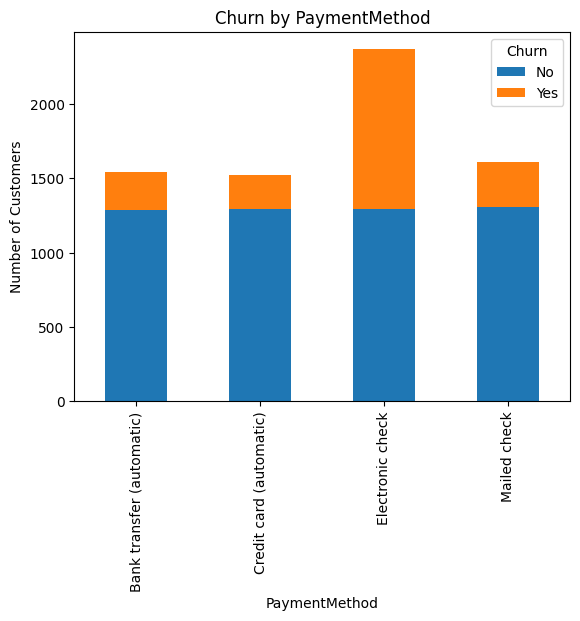

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a cross-tabulation of PaymentMethod vs Churn (counts)
# Shows how many customers churned (Yes) and did not churn (No) for each payment method
print(pd.crosstab(df['PaymentMethod'], df['Churn']))

# Create a cross-tabulation and normalize by row to get churn percentage per payment method
# Multiply by 100 to convert fraction to percentage
print(pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')*100)

# Plot the churn counts by PaymentMethod as a stacked bar chart
pd.crosstab(df['PaymentMethod'], df['Churn']).plot(kind='bar', stacked=True)

# Add y-axis label
plt.ylabel('Number of Customers')

# Add plot title
plt.title('Churn by PaymentMethod')

# Display the plot
plt.show()


OVERVIEW:

*  Customers using electronic checks may not be using automatic online accounts or apps, meaning they are less engaged with the company.
*  Some users may find manual checks slower or more effortful compared to credit/debit card auto-pay And leads to changing the services.

SOLUTION:


*   Send emails, SMS, or app notifications before the payment is due.
*   The company wants Electronic Check users to switch to automatic payments (auto-pay) instead of manually paying each month by providing small rewards.




# 9. How does monthly charges, total charges, and tenure differ between churned vs non-churned customers?
a)Are there obvious outliers in total charges or tenure?
b)What is the distribution of tenure among churners vs non-churners?

      MonthlyCharges                                                    \
               count       mean        std    min    25%     50%   75%   
Churn                                                                    
No            5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4   
Yes           1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2   

              TotalCharges               ...                     tenure  \
          max        count         mean  ...       75%      max   count   
Churn                                    ...                              
No     118.75       5163.0  2555.344141  ...  4264.125  8672.45  5174.0   
Yes    118.35       1869.0  1531.796094  ...  2331.300  8684.80  1869.0   

                                                          
            mean        std  min   25%   50%   75%   max  
Churn                                                     
No     37.569965  24.113777  0.0  15.0  38.0  61.0  72.0  
Yes    17.979133 

/tmp/ipython-input-1964459386.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set1")
/tmp/ipython-input-1964459386.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df, palette="Set2")
/tmp/ipython-input-1964459386.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette="Set3")


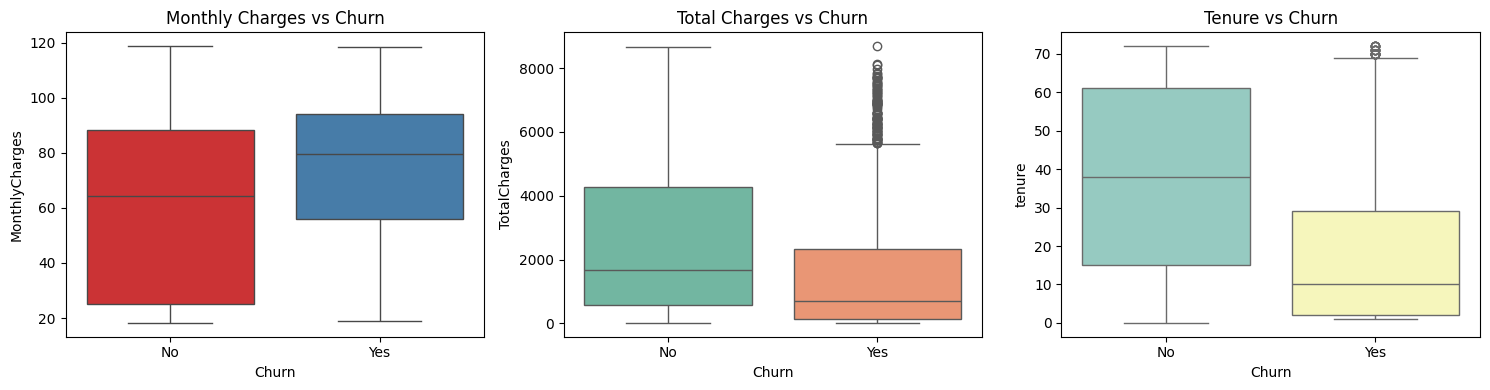

In [ ]:

# Convert TotalCharges to float
#df['TotalCharges'] = df['TotalCharges'].astype(int)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #converting to numerical
                  #errors='coerce' If a value cannot be converted, replace it with NaN instead of throwing an erro
df['Churn_numerical'] = df['Churn'].map({'Yes':1, 'No':0})
print(df.groupby('Churn')[['MonthlyCharges', 'TotalCharges', 'tenure']].describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))

# MonthlyCharges
plt.subplot(1,3,1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set1")
plt.title("Monthly Charges vs Churn")

# TotalCharges
plt.subplot(1,3,2)
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette="Set2")
plt.title("Total Charges vs Churn")

# Tenure
plt.subplot(1,3,3)
sns.boxplot(x='Churn', y='tenure', data=df, palette="Set3")
plt.title("Tenure vs Churn")

plt.tight_layout()
plt.show()


OVERVIEW:  High monthly cost and short tenure increase churn risk, while longer tenure reduces it.


# 9) a)Are there obvious outliers in total charges or tenure?

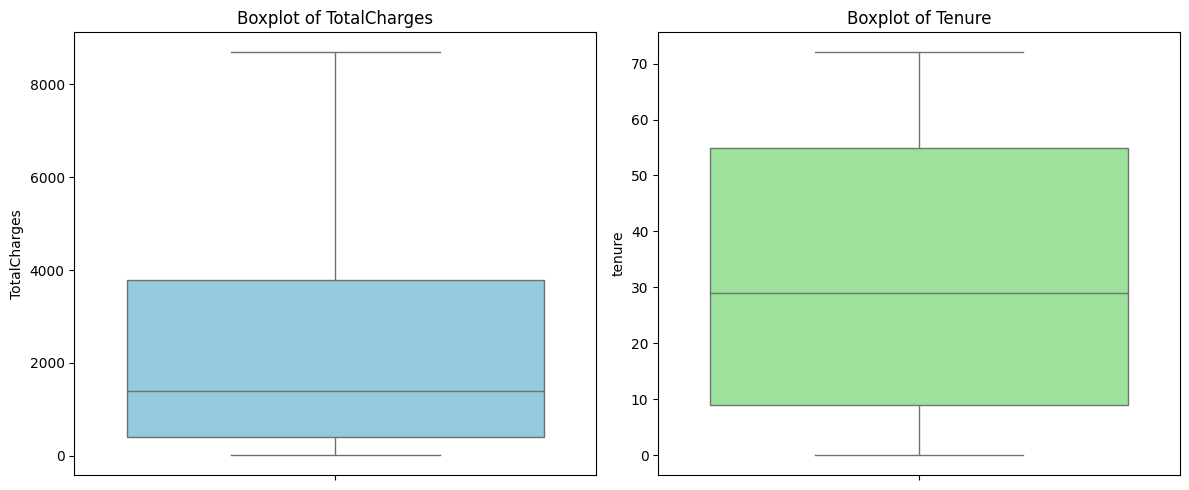

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# TotalCharges
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df, color='skyblue')
plt.title("Boxplot of TotalCharges")

# Tenure
plt.subplot(1,2,2)
sns.boxplot(y='tenure', data=df, color='lightgreen')
plt.title("Boxplot of Tenure")

plt.tight_layout()
plt.show()


overview: there are no outliers.

b) What is the distribution of tenure among churners vs non-churners?

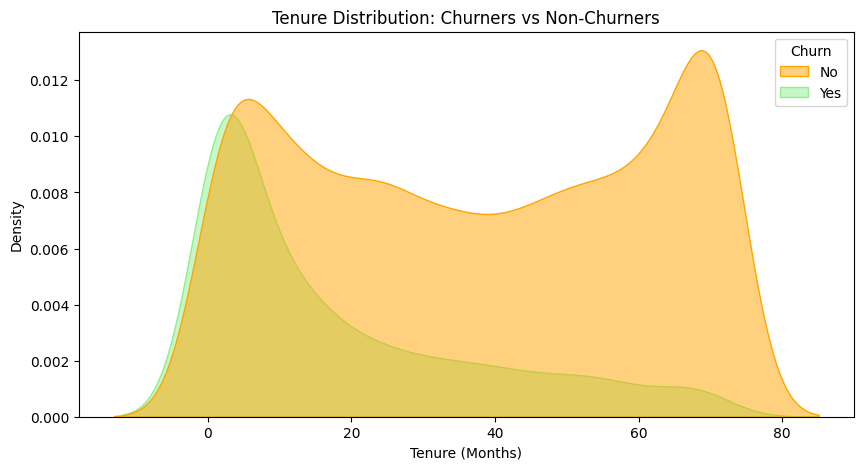

In [ ]:
#What is the distribution of tenure among churners vs non-churners?
#plt.figure(figsize=(6,4))
#sns.violinplot(x='Churn', y='tenure', data=df, palette="Pastel1")
#plt.title("Tenure distribution: Churned vs Non-Churned")
#plt.ylabel("Tenure (months)")
#plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# KDE plot for tenure distribution by churn status
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, palette=['orange','lightgreen'], alpha=0.5)

plt.title("Tenure Distribution: Churners vs Non-Churners")
plt.xlabel("Tenure (Months)")
plt.ylabel("Density")
plt.show()




From kde plot starting months chrun is and later it reduces

# **10**. plot churn rate by tenure buckets (e.g., 0–12 months, 13–24 months, 25–36 months, etc.).

  tenure_bucket  ChurnRate
0          0-12  47.678161
1         13-24  28.710938
2         25-36  21.634615
3         37-48  19.028871
4         49-60  14.423077
5         61-72   6.609808


/tmp/ipython-input-9669720.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_bucket')['Churn_numerical'].mean().reset_index()
/tmp/ipython-input-9669720.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tenure_bucket', y='ChurnRate', data=churn_by_tenure, palette="Blues_d")


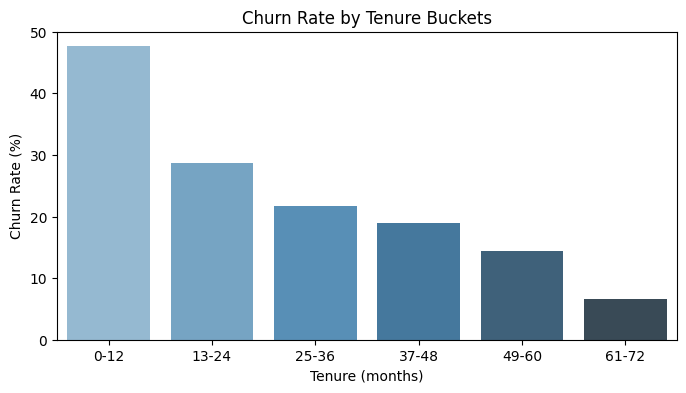

In [ ]:
#Plot churn rate by tenure buckets (e.g., 0–12 months, 13–24 months, 25–36 months, etc.).

# Convert 'Churn' to numeric for calculations (Yes=1, No=0)
df['Churn_numerical'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define bins for tenure ranges (0-12 months, 13-24 months, etc.)
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12','13-24','25-36','37-48','49-60','61-72']

# Create a new column 'tenure_bucket' to categorize customers based on tenure
df['tenure_bucket'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Group by tenure bucket and calculate average churn rate
churn_by_tenure = df.groupby('tenure_bucket')['Churn_numerical'].mean().reset_index()

# Convert churn rate to percentage
churn_by_tenure['ChurnRate'] = churn_by_tenure['Churn_numerical'] * 100

# Print churn rate by tenure buckets
print(churn_by_tenure[['tenure_bucket','ChurnRate']])

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8,4))

# Create bar plot for churn rate by tenure buckets
sns.barplot(x='tenure_bucket', y='ChurnRate', data=churn_by_tenure, palette="Blues_d")

# Add title and axis labels
plt.title("Churn Rate by Tenure Buckets")
plt.xlabel("Tenure (months)")
plt.ylabel("Churn Rate (%)")

# Limit y-axis to 0-50% for better visualization
plt.ylim(0,50)

# Display the plot
plt.show()





*   Customers with short tenure (0-12 months) have the highest churn.

*  As tenure increases, churn rate gradually decreases.

*   Focus retention efforts on new customers, especially in their first year.





# 11. For customers who stayed, what is the average monthly charge by tenure bucket? Has monthly charge grown with tenure?

/tmp/ipython-input-2734184326.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_monthly_by_tenure = stayed.groupby('tenure_bucket')['MonthlyCharges'].mean().reset_index()
/tmp/ipython-input-2734184326.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TenureBucket', y='AvgMonthlyCharges', data=avg_monthly_by_tenure, palette="Greens_d")


  TenureBucket  AvgMonthlyCharges
0         0-12          46.766169
1        13-24          54.449589
2        25-36          60.415414
3        37-48          61.977229
4        49-60          67.579143
5        61-72          74.440563


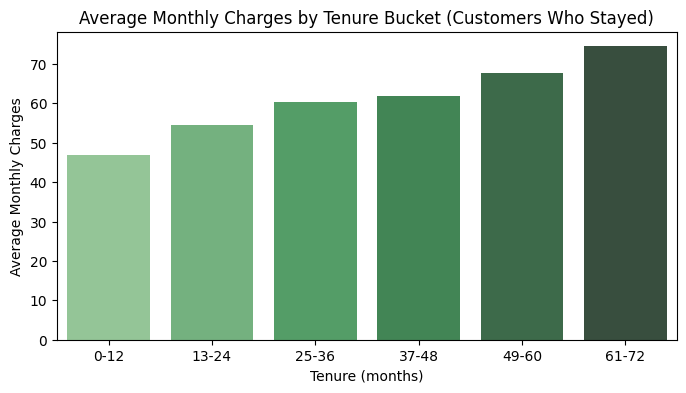

In [ ]:
# Filter customers who stayed (Churn == 'No')
stayed = df[df['Churn'] == 'No']

# Group by tenure bucket and calculate average monthly charges
avg_monthly_by_tenure = stayed.groupby('tenure_bucket')['MonthlyCharges'].mean().reset_index()

# Rename columns for clarity
avg_monthly_by_tenure.columns = ['TenureBucket','AvgMonthlyCharges']

# Print the average monthly charges by tenure bucket
print(avg_monthly_by_tenure)

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(8,4))

# Create a bar plot for average monthly charges by tenure bucket
sns.barplot(x='TenureBucket', y='AvgMonthlyCharges', data=avg_monthly_by_tenure, palette="Greens_d")

# Add plot title and axis labels
plt.title("Average Monthly Charges by Tenure Bucket (Customers Who Stayed)")
plt.xlabel("Tenure (months)")
plt.ylabel("Average Monthly Charges")

# Display the plot
plt.show()






*  Average monthly charges tend to increase slightly with tenure, meaning long-term customers may be using more services or higher-tier plans.




# 12. Is there a “critical churn threshold” in tenure (a period after which customers rarely churn)?

/tmp/ipython-input-1241393760.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_bucket')['Churn_numerical'].mean().reset_index()


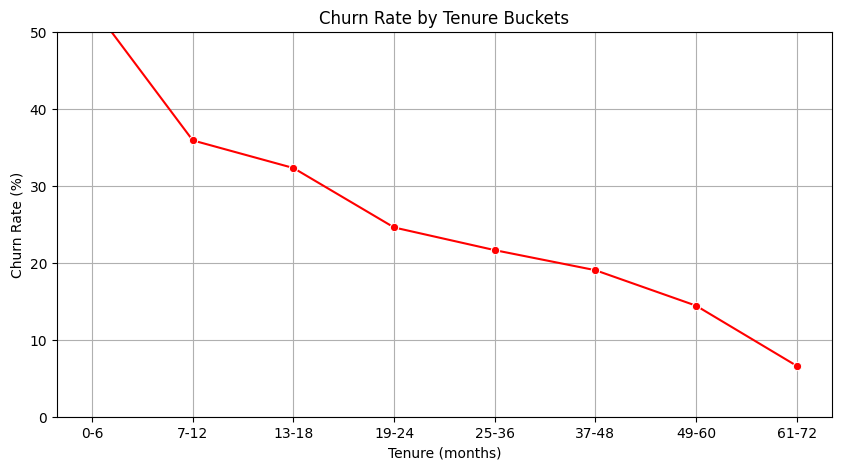

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Churn to numeric (Yes=1, No=0)
df['Churn_numerical'] = df['Churn'].map({'Yes':1, 'No':0})

# Define tenure bins and labels
bins = [0, 6, 12, 18, 24, 36, 48, 60, 72]
labels = ['0-6','7-12','13-18','19-24','25-36','37-48','49-60','61-72']

# Create tenure_bucket column
df['tenure_bucket'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Calculate churn rate per tenure bucket
churn_by_tenure = df.groupby('tenure_bucket')['Churn_numerical'].mean().reset_index()
churn_by_tenure['ChurnRate'] = churn_by_tenure['Churn_numerical']*100

# Plot churn rate by tenure buckets
plt.figure(figsize=(10,5))
sns.lineplot(x='tenure_bucket', y='ChurnRate', data=churn_by_tenure, marker='o', color='red')
plt.title("Churn Rate by Tenure Buckets")
plt.xlabel("Tenure (months)")
plt.ylabel("Churn Rate (%)")
plt.ylim(0,50)
plt.grid(True)
plt.show()


OVERVIEW: customers who stay beyond 24–36 months rarely churn.

# 13. Are there strong correlations between numerical features (tenure, MonthlyCharges, TotalCharges)?

                 tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000


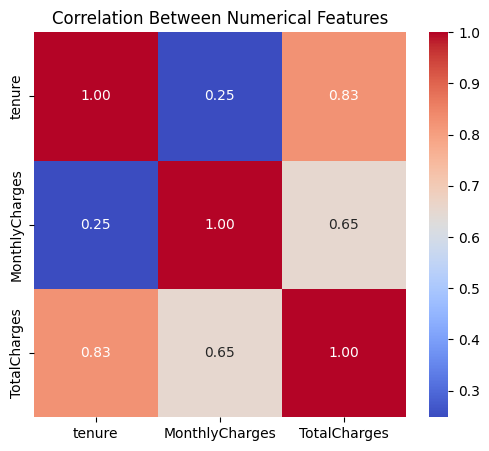

In [ ]:

# Select numerical features for correlation analysis
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
num_df = df[numerical_features]

# Calculate correlation matrix between numerical features
corr_matrix = num_df.corr()
print(corr_matrix)  # Print correlation values

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6,5))

# Plot heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()



overview: TotalCharges depends on tenure and monthly charges, but monthly charges alone don’t vary much with tenure

# 14. Do customers with higher monthly charges churn more if they're on month-to-month contracts vs longer contracts?

         Contract Churn  MonthlyCharges
0  Month-to-month    No       61.462635
1  Month-to-month   Yes       73.019396
2        One year    No       62.508148
3        One year   Yes       85.050904
4        Two year    No       60.012477
5        Two year   Yes       86.777083


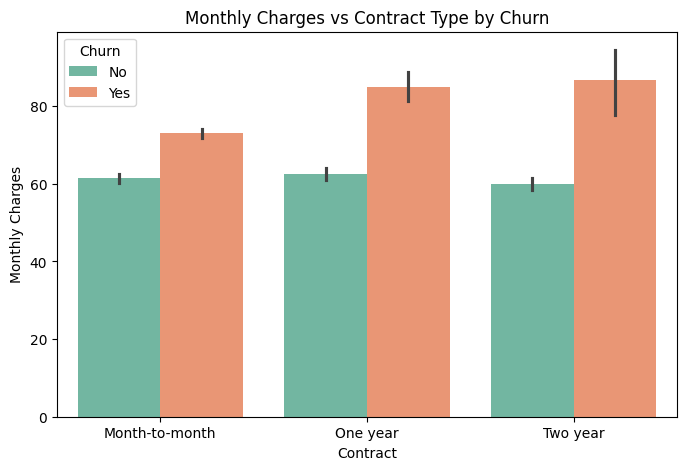

In [ ]:
# Convert 'Churn' to numeric for calculations (Yes=1, No=0)
df['Churn_numerical'] = df['Churn'].map({'Yes':1, 'No':0})

# Calculate average monthly charges grouped by Contract type and Churn status
avg_charges = df.groupby(['Contract', 'Churn'])['MonthlyCharges'].mean().reset_index()
print(avg_charges)  # Display average monthly charges

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8,5))

# Create bar plot of monthly charges by contract type, separated by churn
sns.barplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, palette="Set2")

# Add title and axis labels
plt.title("Monthly Charges vs Contract Type by Churn")
plt.ylabel("Monthly Charges")
plt.show()


OVERVIEW: High monthly charges increase churn mostly for short-term (month-to-month) customers.

# 14. is there a difference in churn for customers with long tenure but high monthly charges vs low charges?

High charges churn rate: 21.48%
Low charges churn rate: 7.12%


/tmp/ipython-input-4067499667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_tenure['Churn_numeric'] = long_tenure['Churn'].map({'Yes': 1, 'No': 0})


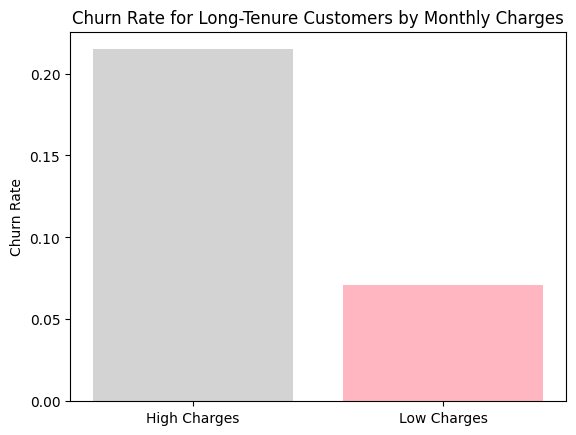

In [ ]:
#s there a difference in churn for customers with long tenure but high monthly charges vs low charges?
import pandas as pd

# 1 Filter long-tenure customers (e.g., tenure >= 24 months)
long_tenure = df[df['tenure'] >= 24]

# 2 Convert Churn to numeric
long_tenure['Churn_numeric'] = long_tenure['Churn'].map({'Yes': 1, 'No': 0})

# 3 Split into high and low monthly charges based on median
median_charge = long_tenure['MonthlyCharges'].median()
high_charge = long_tenure[long_tenure['MonthlyCharges'] > median_charge]
low_charge = long_tenure[long_tenure['MonthlyCharges'] <= median_charge]

# 4 Calculate mean churn rate for both groups
high_churn_rate = high_charge['Churn_numeric'].mean()
low_churn_rate = low_charge['Churn_numeric'].mean()

# 5 Print results
print(f"High charges churn rate: {high_churn_rate:.2%}")
print(f"Low charges churn rate: {low_churn_rate:.2%}")

# 6 Optional: visualize
import matplotlib.pyplot as plt

plt.bar(['High Charges', 'Low Charges'], [high_churn_rate, low_churn_rate], color=['lightgrey','lightpink'])
plt.ylabel('Churn Rate')
plt.title('Churn Rate for Long-Tenure Customers by Monthly Charges')
plt.show()



overview: Even loyal, long-tenure customers can churn if their monthly charges are perceived as high.

# 15. Can you segment customers by service usage and demographic features and observe different churn behaviors? For example: “customers with fiber internet + streaming services + month-to-month contract” vs “customers with DSL + two-year contract”.

Segment 1 churn rate: 56.80%
Segment 2 churn rate: 1.91%


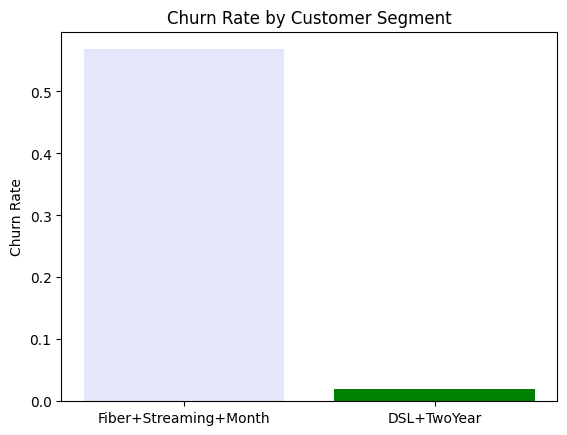

In [ ]:
#Can you segment customers by service usage and demographic features and observe different churn behaviors? For example: “customers with fiber internet + streaming services + month-to-month contract” vs “customers with DSL + two-year contract”.
import pandas as pd

# 1 Convert Churn to numeric
df['Churn_numeric'] = df['Churn'].map({'Yes':1, 'No':0})

# 2 Segment 1: Fiber + StreamingTV + Month-to-Month
segment1 = df[
    (df['InternetService'] == 'Fiber optic') &
    (df['StreamingTV'] == 'Yes') &
    (df['Contract'] == 'Month-to-month')
]

# 3️ Segment 2: DSL + Two-Year Contract
segment2 = df[
    (df['InternetService'] == 'DSL') &
    (df['Contract'] == 'Two year')
]

# 4️ Calculate churn rates
churn_segment1 = segment1['Churn_numeric'].mean()
churn_segment2 = segment2['Churn_numeric'].mean()

print(f"Segment 1 churn rate: {churn_segment1:.2%}")
print(f"Segment 2 churn rate: {churn_segment2:.2%}")

# 5️Optional: visualize
import matplotlib.pyplot as plt

plt.bar(['Fiber+Streaming+Month', 'DSL+TwoYear'], [churn_segment1, churn_segment2], color=['lavender','green'])
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Segment')
plt.show()




*   Month-to-month contracts give them flexibility to leave anytime + Fiber customers often face higher charges leads to higher churn.
*  Long contracts lock them in, DSL is cheaper than Fiber, and these customers are more stable/loyal.



# 16. Which customer segments have the lowest churn rates? What are their common characteristics?

   InternetService  Contract          StreamingTV  churn_rate  count
14              No  Two year  No internet service    0.007837    638
4              DSL  Two year                   No    0.017857    224
5              DSL  Two year                  Yes    0.019802    404
13              No  One year  No internet service    0.024725    364
10     Fiber optic  Two year                   No    0.039474     76


/tmp/ipython-input-2231026116.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


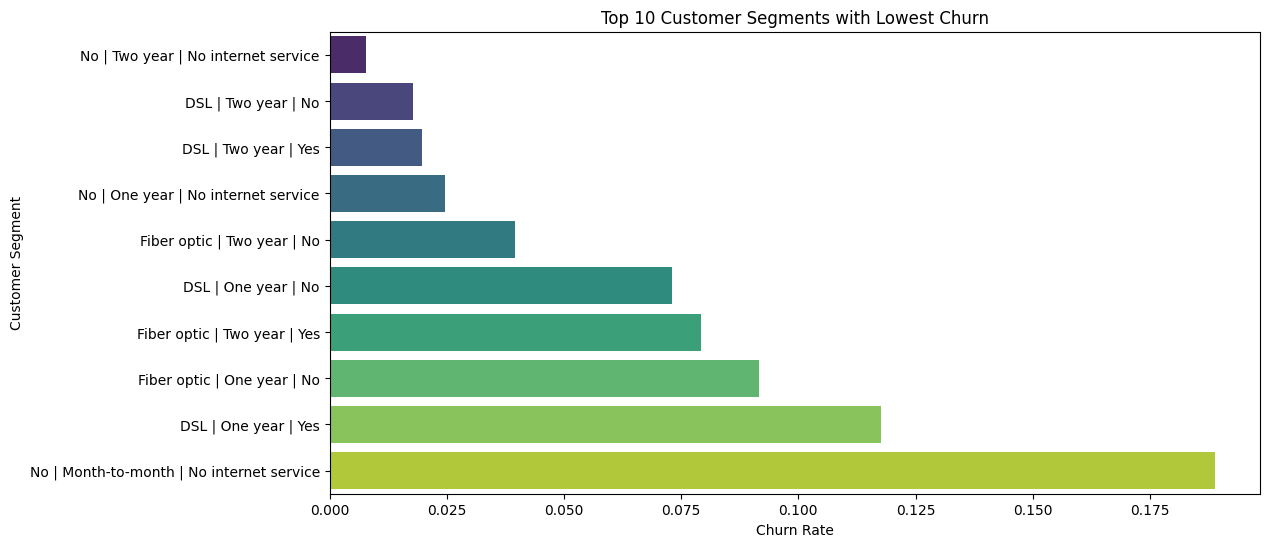

In [ ]:
import pandas as pd

# Convert churn to numeric
df['Churn_numeric'] = df['Churn'].map({'Yes':1, 'No':0})

# Segment by Internet + Contract + StreamingTV
segments = df.groupby(['InternetService', 'Contract', 'StreamingTV']).agg(
    churn_rate=('Churn_numeric','mean'),
    count=('Churn_numeric','count')
).reset_index()

# Sort by churn rate ascending (lowest churn first)
segments_sorted = segments.sort_values('churn_rate')
print(segments_sorted.head(5))

import matplotlib.pyplot as plt
import seaborn as sns

# Sort by churn rate ascending (lowest churn first)
top_segments = segments_sorted.head(10)  # top 10 lowest churn segments

# Create a bar plot
plt.figure(figsize=(12,6))
sns.barplot(
    x='churn_rate',
    y=top_segments.apply(lambda row: f"{row['InternetService']} | {row['Contract']} | {row['StreamingTV']}", axis=1),
    data=top_segments,
    palette='viridis'
)
plt.xlabel('Churn Rate')
plt.ylabel('Customer Segment')
plt.title('Top 10 Customer Segments with Lowest Churn')
plt.show()


# 22. Create a bar chart or heatmap showing churn rate by contract type and internet service type.

         Contract InternetService  churn_rate  count
0  Month-to-month             DSL    0.322159   1223
1  Month-to-month     Fiber optic    0.546053   2128
2  Month-to-month              No    0.188931    524
3        One year             DSL    0.092982    570
4        One year     Fiber optic    0.192950    539
5        One year              No    0.024725    364
6        Two year             DSL    0.019108    628
7        Two year     Fiber optic    0.072261    429
8        Two year              No    0.007837    638


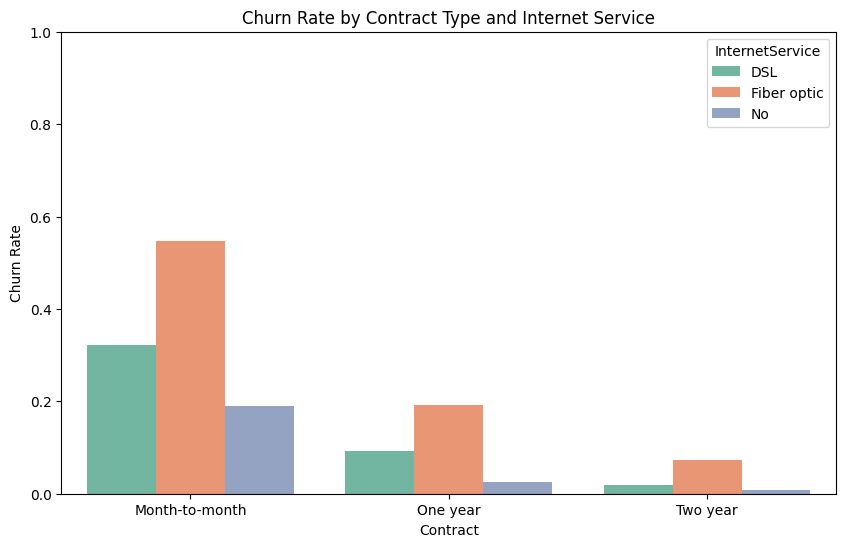

In [ ]:
#Create a bar chart or heatmap showing churn rate by contract type and internet service type.
import pandas as pd

# Convert Churn to numeric
df['Churn_numeric'] = df['Churn'].map({'Yes':1, 'No':0})

# Group by Contract and InternetService
churn_summary = df.groupby(['Contract', 'InternetService']).agg(
    churn_rate=('Churn_numeric','mean'),
    count=('Churn_numeric','count')
).reset_index()
print(churn_summary)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x='Contract',
    y='churn_rate',
    hue='InternetService',
    data=churn_summary,
    palette='Set2'
)
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type and Internet Service')
plt.ylim(0,1)
plt.show()


# 23. violin plots to compare MonthlyCharges and TotalCharges distributions between churners and non-churners.

/tmp/ipython-input-3479801113.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='Set1', inner='quartile')


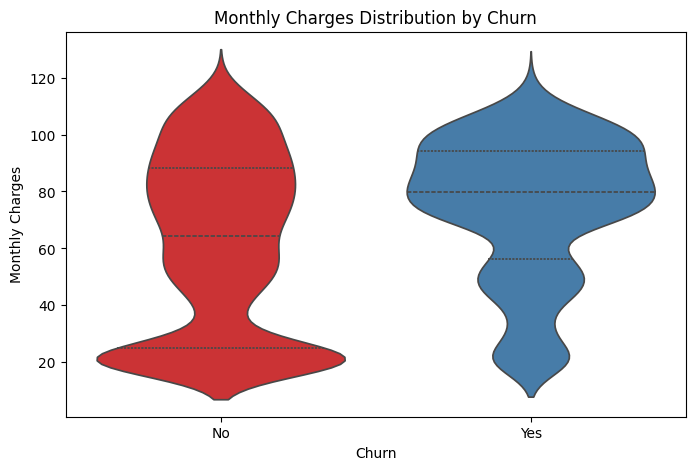

/tmp/ipython-input-3479801113.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='TotalCharges', data=df, palette='Set2', inner='quartile')


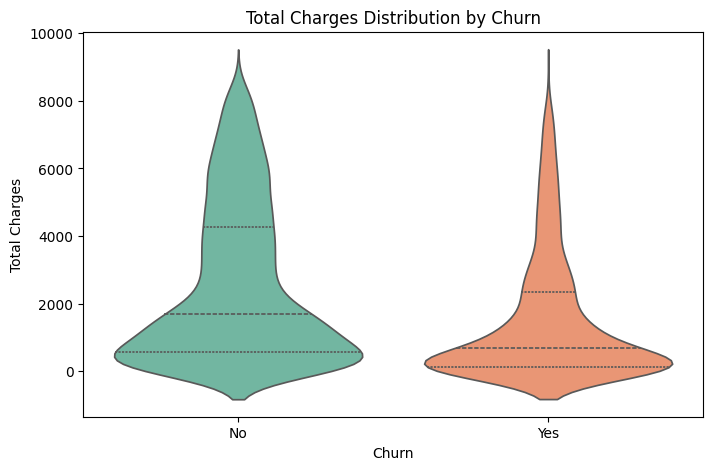

In [ ]:
#violin plots to compare MonthlyCharges and TotalCharges distributions between churners and non-churners.

plt.figure(figsize=(8,5))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='Set1', inner='quartile')
plt.title('Monthly Charges Distribution by Churn')
plt.ylabel('Monthly Charges')
plt.xlabel('Churn')
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(x='Churn', y='TotalCharges', data=df, palette='Set2', inner='quartile')
plt.title('Total Charges Distribution by Churn')
plt.ylabel('Total Charges')
plt.xlabel('Churn')
plt.show()


# 24. Plot scatterplots or jointplots (with regression or smoothing) for tenure vs total charges, colored by churn status.

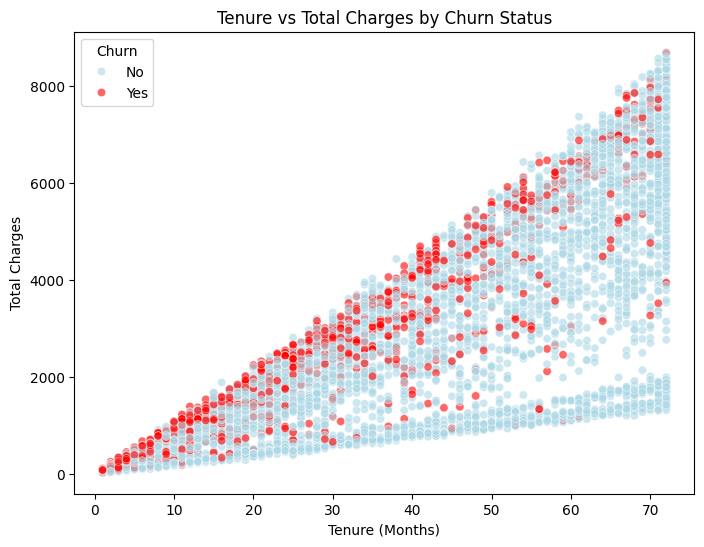

In [ ]:
#Plot scatterplots or jointplots (with regression or smoothing) for tenure vs total charges, colored by churn status.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='tenure',
    y='TotalCharges',
    hue='Churn',
    data=df,
    palette={'Yes':'red','No':'lightblue'},
    alpha=0.6
)
plt.title('Tenure vs Total Charges by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges')
plt.show()


# 25. Plot a correlation heatmap of numerical features, and annotate where churners differ.

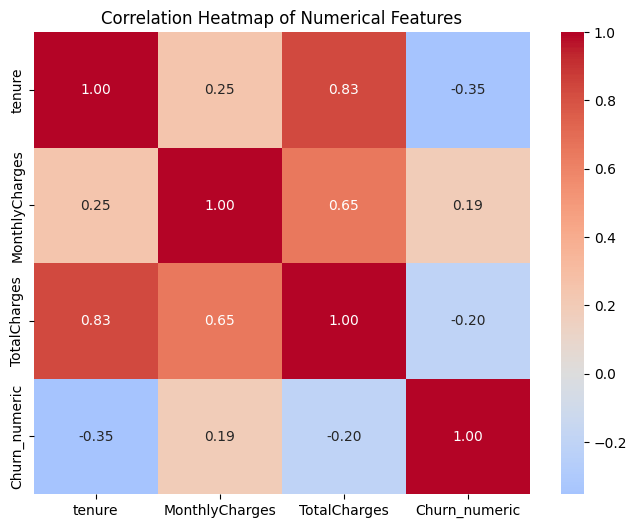

In [ ]:
#Plot a correlation heatmap of numerical features, and annotate where churners differ.

df['Churn_numeric'] = df['Churn'].map({'Yes':1,'No':0})

# Select numeric columns
numeric_cols = ['tenure','MonthlyCharges','TotalCharges','Churn_numeric']
numeric_df = df[numeric_cols]

plt.figure(figsize=(8,6))
corr = numeric_df.corr()  # Pearson correlation
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# 21. Are there outliers in MonthlyCharges or TotalCharges? How would you handle them if you were preparing the data for modeling?

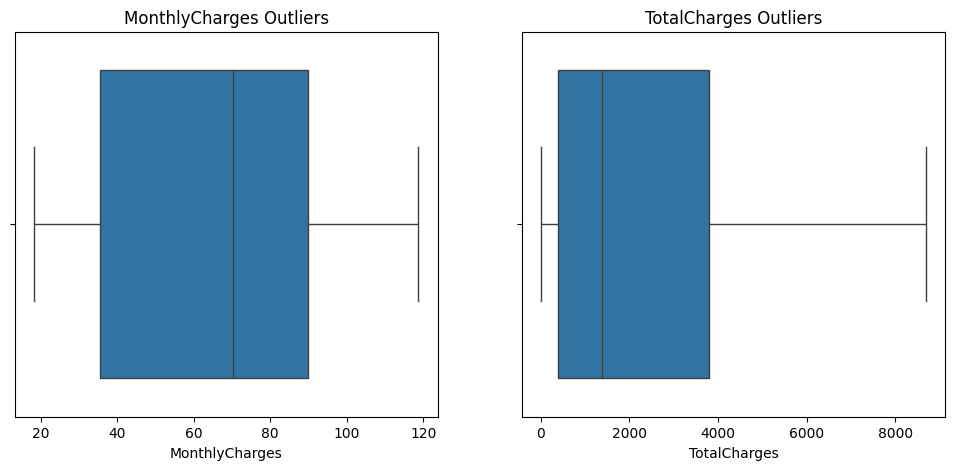

MonthlyCharges outliers: 0
TotalCharges outliers: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for visual detection
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['MonthlyCharges'])
plt.title("MonthlyCharges Outliers")

plt.subplot(1,2,2)
sns.boxplot(x=df['TotalCharges'])
plt.title("TotalCharges Outliers")

plt.show()

# IQR method
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return series[(series < lower) | (series > upper)]

monthly_outliers = detect_outliers(df['MonthlyCharges'])
total_outliers = detect_outliers(df['TotalCharges'])

print(f"MonthlyCharges outliers: {len(monthly_outliers)}")
print(f"TotalCharges outliers: {len(total_outliers)}")


In [ ]:
#handling the outliers
import numpy as np

# Cap MonthlyCharges at 99th percentile
upper_mc = df['MonthlyCharges'].quantile(0.99)
df['MonthlyCharges'] = np.where(df['MonthlyCharges'] > upper_mc, upper_mc, df['MonthlyCharges'])

# Cap TotalCharges at 99th percentile
upper_tc = df['TotalCharges'].quantile(0.99)
df['TotalCharges'] = np.where(df['TotalCharges'] > upper_tc, upper_tc, df['TotalCharges'])


OVERVIEW: can handle the outliers in two ways

1.   By removing them.
2.   By replacing them with lower and upper values



In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
print(df['TotalCharges'].isnull().sum())

11


In [ ]:
# Example: check tenure vs charges
df[(df['tenure']==0) & (df['TotalCharges']>0)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Churn_numerical,PhoneService_num,InternetService_num,StreamingTV_num,StreamingMovies_num,TotalServices,tenure_bucket,Churn_numeric


In [ ]:
/Users/suri/Downloads/group2_dataset.csv